## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [54]:
#from __future__ import print_function, division
import os
import numpy 
import matplotlib.pylab as pl
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix
import scipy.stats as stats
from sklearn import linear_model
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

In [55]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
contents = []
contents.append(('male','pinc08_2'))
contents.append(('female', 'pinc08_3'))
contents.append(('all_eth', '_1_1'))
contents.append(('white', '_1_4'))
contents.append(('black', '_1_6'))
contents.append(('asian', '_1_8'))
contents.append(('hispanic', '_1_9')) 

allmales = {}
allfemales = {}
for i in range(len(contents) - 2):
    allmales[contents[i+2][0]] = pd.read_excel(url+contents[0][1]+contents[i+2][1]+'.xls', header=9, skip_footer=1)
    allfemales[contents[i+2][0]] = pd.read_excel(url+contents[1][1]+contents[i+2][1]+'.xls', header=9, skip_footer=1)

In [44]:
#allfemales and allmales should be dictionari

In [4]:
allmales['all_eth'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


In [56]:
for content in contents[2:]:
    del allmales[content[0]]['Unnamed: 44']
    del allmales[content[0]]['Unnamed: 46']
    del allmales[content[0]]['Unnamed: 48']
    del allfemales[content[0]]['Unnamed: 44']
    del allfemales[content[0]]['Unnamed: 46']
    del allfemales[content[0]]['Unnamed: 48']

allmales['black'].head()
    

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$85,000 to $87,499","$87,500 to $89,999","$90,000 to $92,499","$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Mean income,Gini ratio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Value\n(Dol.),Value\n(Dol.),Ratio
1,....Total,11671.0,549.0,440.0,557.0,898.0,649.0,509.0,688.0,480.0,...,47.0,38.0,65.0,20.0,26.0,38.0,601.0,24855,36117,0.498
2,Earnings,8441.0,364.0,300.0,356.0,306.0,368.0,216.0,535.0,267.0,...,48.0,18.0,76.0,5.0,20.0,19.0,483.0,30389,40443,0.474
3,..Wages and Salary,8079.0,328.0,288.0,329.0,281.0,327.0,207.0,507.0,255.0,...,47.0,17.0,84.0,5.0,20.0,19.0,441.0,30686,40409,0.465
4,..Nonfarm Self-Employment,581.0,168.0,31.0,43.0,28.0,63.0,8.0,38.0,6.0,...,6.0,0.0,6.0,0.0,0.0,0.0,20.0,10786,25052,0.703


In [6]:
allmales['all_eth'].dtypes

Characteristic           object
Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 

In [57]:
for content in contents[2:]:
    allmales[content[0]]['Median income'] = pd.to_numeric(allmales[content[0]]['Median income'], errors='coerce')
    allmales[content[0]]['Mean income'] = pd.to_numeric(allmales[content[0]]['Mean income'], errors='coerce')
    allmales[content[0]]['Gini ratio'] = pd.to_numeric(allmales[content[0]]['Gini ratio'], errors='coerce')
    allfemales[content[0]]['Median income'] = pd.to_numeric(allfemales[content[0]]['Median income'], errors='coerce')
    allfemales[content[0]]['Mean income'] = pd.to_numeric(allfemales[content[0]]['Mean income'], errors='coerce')
    allfemales[content[0]]['Gini ratio'] = pd.to_numeric(allfemales[content[0]]['Gini ratio'], errors='coerce')
    #Remove NaN values
    #allmales[content[0]].dropna(inplace=True)
    #allfemales[content[0]].dropna(inplace=True)
    #Replace index with characteristic
    allmales[content[0]].index = allmales[content[0]]['Characteristic']
    del allmales[content[0]]['Characteristic']
    allfemales[content[0]].index = allfemales[content[0]]['Characteristic']
    del allfemales[content[0]]['Characteristic']
    #Print shapes
    print 'allmales[{0}] {1}'.format(content[0], allmales[content[0]].shape)
    print 'allfemales[{0}] {1}'.format(content[0], allfemales[content[0]].shape)

allmales[all_eth] (48, 45)
allfemales[all_eth] (48, 45)
allmales[white] (48, 45)
allfemales[white] (48, 45)
allmales[black] (48, 45)
allfemales[black] (48, 45)
allmales[asian] (48, 45)
allfemales[asian] (48, 45)
allmales[hispanic] (48, 45)
allfemales[hispanic] (48, 45)


In [8]:
allmales['all_eth'].dtypes

Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 to $74,999      float64
$75,000 

In [9]:
allfemales['all_eth']['Gini ratio'].unique()

array([   nan,  0.495,  0.466,  0.461,  0.65 ,  0.916,  0.258,  0.315,
        0.464,  0.42 ,  0.519,  0.515,  0.531,  0.644,  0.863,  0.893,
        0.777,  0.743,  0.532,  0.467,  0.431,  0.426,  0.304,  0.522,
        0.598,  0.516,  0.547,  0.437,  0.331,  0.418,  0.358,  0.604,
        0.617,  0.513,  0.51 ,  0.728,  0.482,  0.471,  0.259,  0.372,
        0.387,  0.383,  0.277,  0.528])

# Descriptive phase: 


In [47]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

('#####', 'hispanic')
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               Na

# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

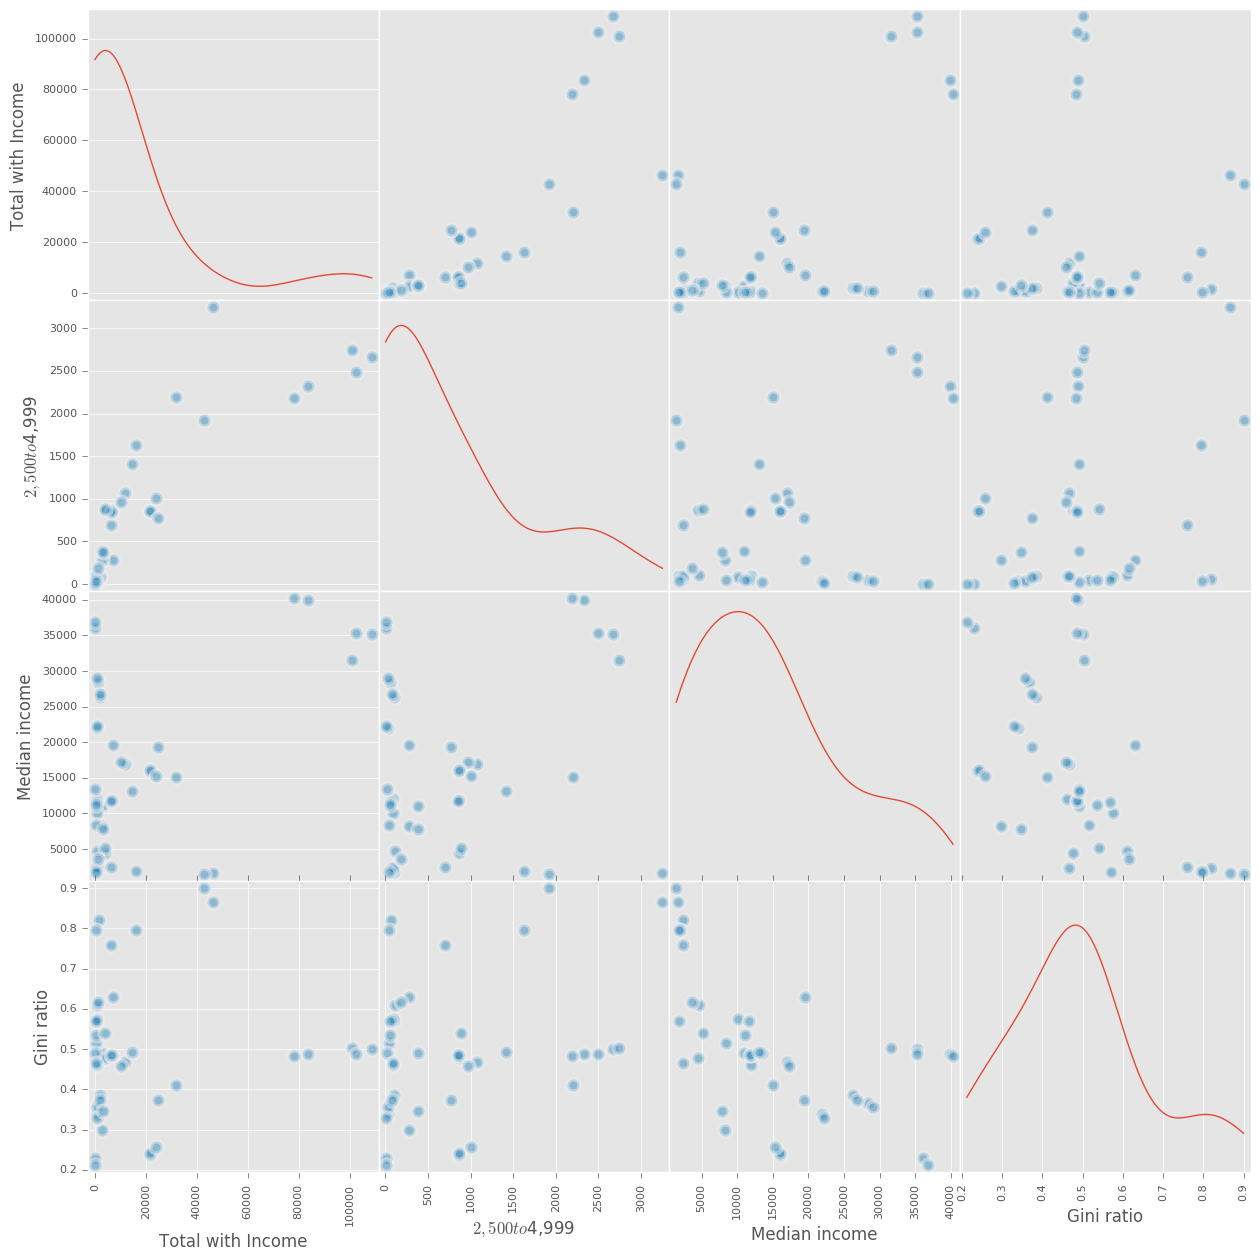

In [11]:
fig = pd.scatter_matrix(allmales['all_eth']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(15,15), 
                        diagonal='kde')  

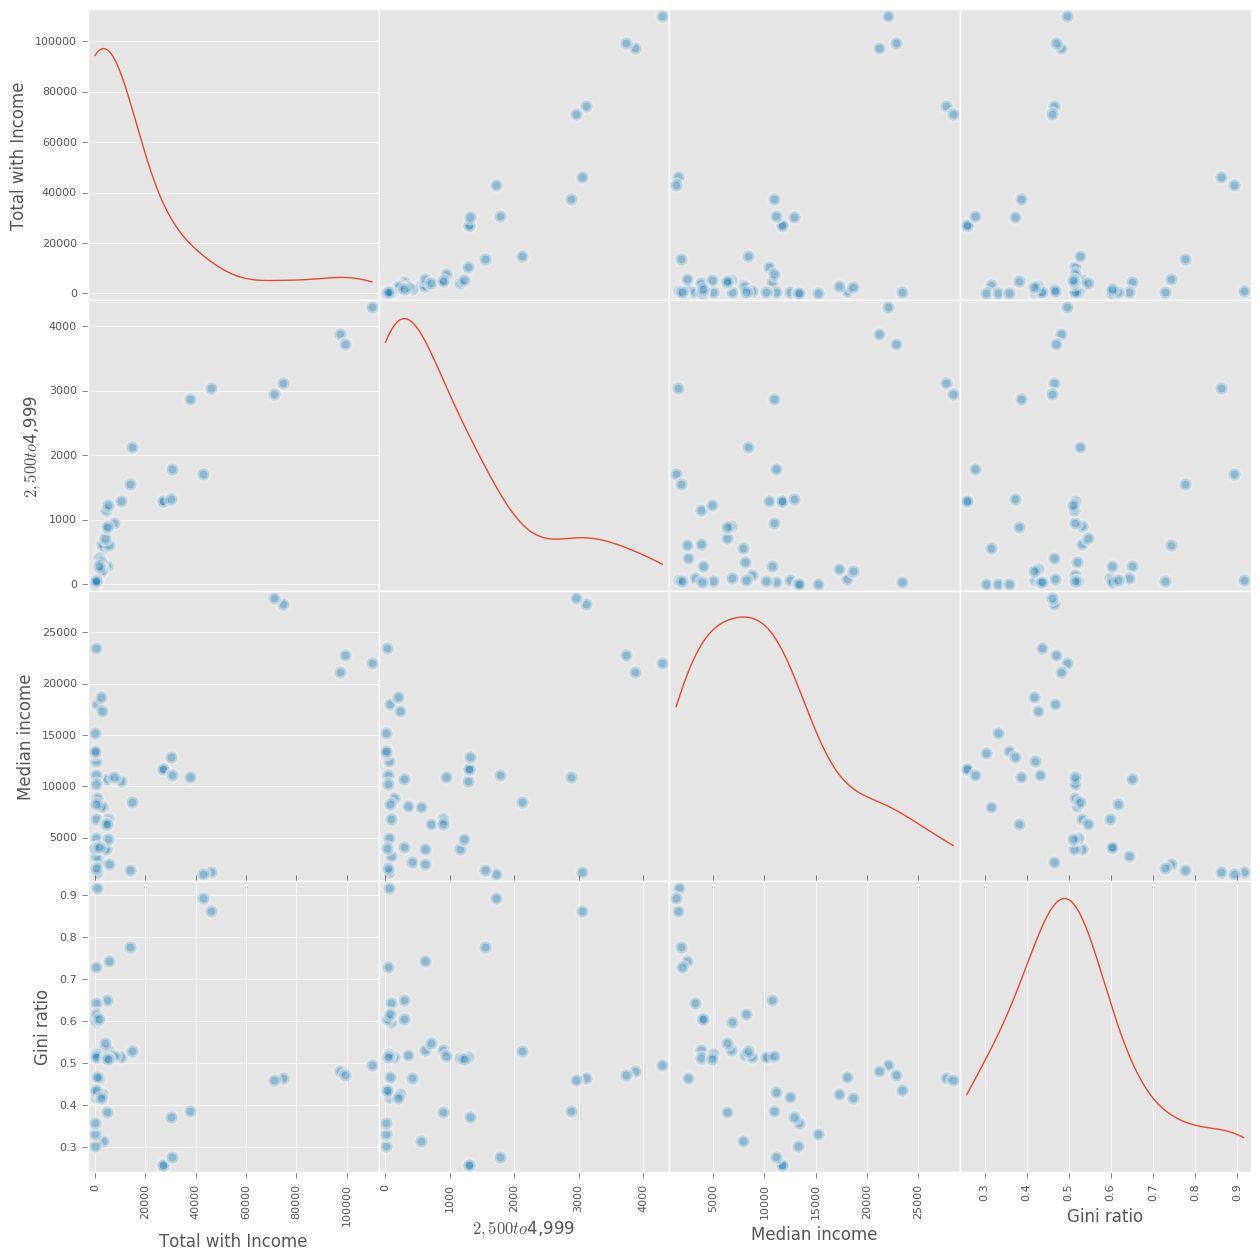

In [12]:
fig = pd.scatter_matrix(allfemales['all_eth']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(15,15), 
                        diagonal='kde')  

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

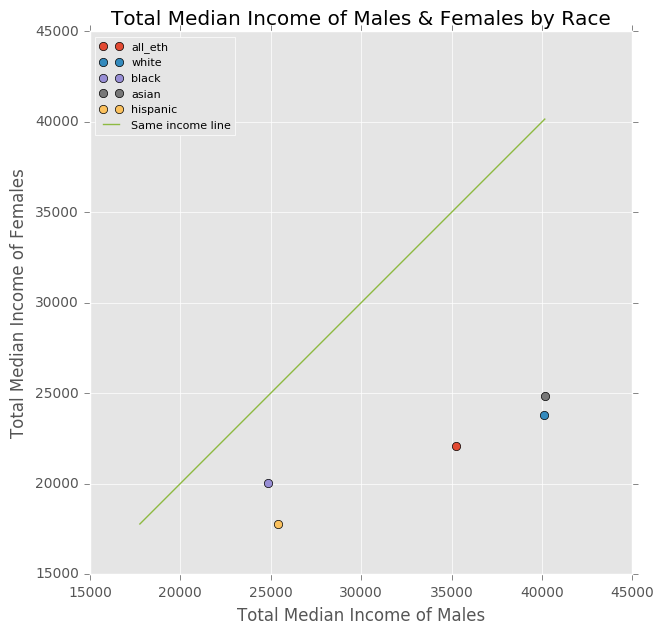

In [58]:
plt.figure(figsize=(7,7))
X = []
Y = []
for content in contents[2:]:
    y = (allfemales[content[0]].loc['....Total']['Median income'])
    x = (allmales[content[0]].loc['....Total']['Median income'])
    X.append(x)
    Y.append(y)
    plt.plot(x, y, 'o', label=content[0])
    
xy = np.arange(min(Y), max(X), 0.1)
plt.plot(xy, xy, label='Same income line')
plt.xlabel('Total Median Income of Males')
plt.ylabel('Total Median Income of Females')
plt.title('Total Median Income of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 8)

# Figure 3: Total Median Income of Males & Females by Race. The line represents the equal incomes for males & females, the points which are below the equaliser line indicates that the males have more income than females.

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 

Regression Coefficients with intercepts:
Intercept: [ 9989.84440839]
Co-efficient: [[ 0.35314068]]
R_squared: 0.883268367498

Regression Coefficients without intercepts:
Intercept: 0.0
Co-efficient: [[ 0.64232166]]
R_squared: 0.266116129824


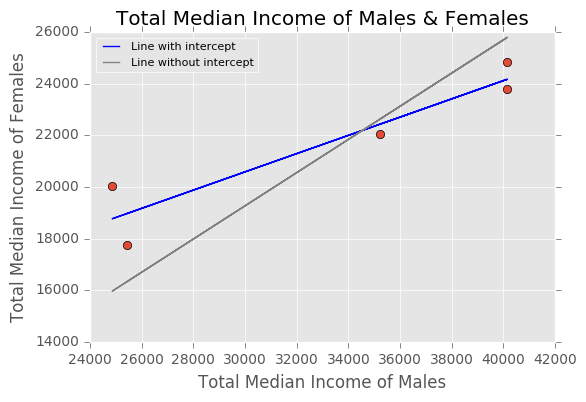

In [59]:
# Initialize model
regression_model = linear_model.LinearRegression()
regression_model_int = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the data
regression_model.fit(X = np.array(X).reshape(-1,1), 
                     y = np.array(Y).reshape(-1,1))

# Check trained model y-intercept
print 'Regression Coefficients with intercepts:'
print 'Intercept:', regression_model.intercept_
print 'Co-efficient:', regression_model.coef_
print 'R_squared:', regression_model.score(X = np.array(X).reshape(-1,1), 
                                           y = np.array(Y).reshape(-1,1))

train_prediction = regression_model.predict(X = np.array(X).reshape(-1,1))

# Plot regression line
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept')

#Check the model without intercept
regression_model_int.fit(X = np.array(X).reshape(-1,1), 
                         y = np.array(Y).reshape(-1,1))
# Check trained model y-intercept
print '\nRegression Coefficients without intercepts:'
print 'Intercept:', regression_model_int.intercept_
print 'Co-efficient:', regression_model_int.coef_
print 'R_squared:', regression_model_int.score(X = np.array(X).reshape(-1,1), 
                                               y = np.array(Y).reshape(-1,1))

train_prediction_int = regression_model_int.predict(X = np.array(X).reshape(-1,1))

# Plot regression line without intercept
plt.plot(X,      # Explanitory variable
         train_prediction_int,  # Predicted values
         color="grey", label='Line without intercept')

plt.plot(X, Y, 'o')
plt.xlabel('Total Median Income of Males')
plt.ylabel('Total Median Income of Females')
plt.title('Total Median Income of Males & Females')
plt.legend(loc='best', fontsize = 8)

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


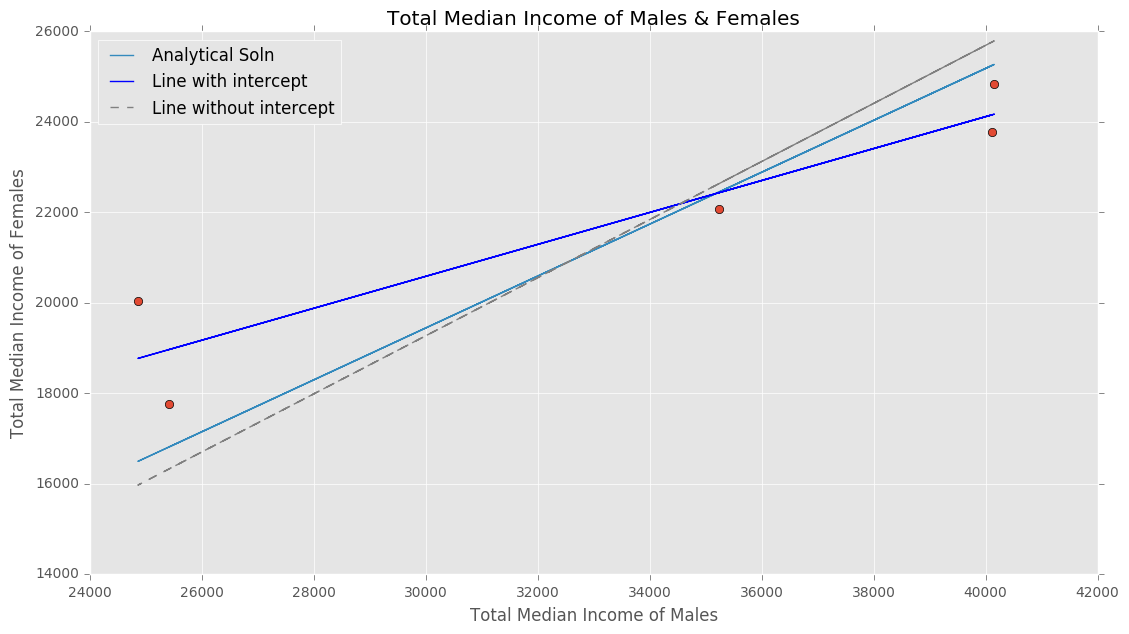

In [61]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values

all_males=np.array([0.0, allmales['all_eth'].loc['....Total','Median income'],
                    allmales['white'].loc['....Total','Median income'],
                    allmales['black'].loc['....Total','Median income'],
                     allmales['hispanic'].loc['....Total','Median income'],
                    allmales['asian'].loc['....Total','Median income']])

all_females=np.array([0.0]+ [allfemales[k].loc['....Total','Median income'] \
                             for k in ['all_eth', 'white', 'black',
                                     'hispanic','asian']])


cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

def lines_func(a, x, b):
    return a*x + b

y = lines_func(beta1, np.array(X), beta0)

plt.figure(figsize=(13,7))

#Plot total median income of males and females 
plt.plot(X, Y, 'o')

#plot analytical solution
plt.plot(X, y , lw = 1, label='Analytical Soln')

# Plot regression line
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept')

# Plot regression line without intercept
plt.plot(X,      # Explanitory variable
         train_prediction_int,  # Predicted values
         color="grey", label='Line without intercept', ls='--')

plt.xlabel('Total Median Income of Males')
plt.ylabel('Total Median Income of Females')
plt.title('Total Median Income of Males & Females')
plt.legend(loc='best', fontsize=12)

In [ ]:
#2.5. Calculate R-squared.
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
R_2

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

Regression Coefficients with intercepts:
Intercept: [ 1506.55541391]
Co-efficient: [[ 0.62449128]]
R_squared: 0.863905723784

Regression Coefficients without intercepts:
Intercept: 0.0
Co-efficient: [[ 0.68787339]]
R_squared: 0.849494725673


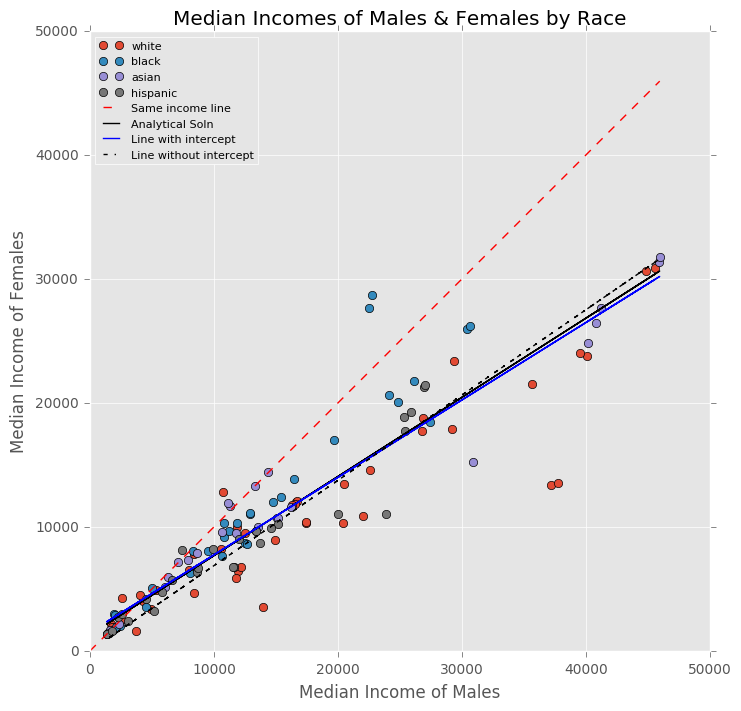

In [16]:
X = []
Y = []
plt.figure(figsize=(8,8))
for content in contents[3:]:
    x = (allmales[content[0]].loc[:,['Median income']]).values.flatten()
    y = (allfemales[content[0]].loc[:,['Median income']]).values.flatten()
    mask = ~(np.isnan(x) + np.isnan(y))
    X.extend(x[mask])
    Y.extend(y[mask])
    plt.plot(x[mask], y[mask], 'o', label=content[0])

xy = np.arange(0, max(X), 0.1)
plt.plot(xy, xy, 'r--', label='Same income line')    

#Analytical Model
cor = stats.spearmanr(X, Y)
beta1 = cor[0] * np.array(Y).std() / np.array(X).std()
beta0 = np.array(Y).mean() - beta1 * np.array(X).mean()
beta0, beta1

def lines_func(a, x, b):
    return a*x + b

y = lines_func(beta1, np.array(X), beta0)

#plot analytical solution
plt.plot(X, y , lw = 1, color='black', label='Analytical Soln')

# Initialize model
regression_model = linear_model.LinearRegression()
regression_model_int = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the data
regression_model.fit(X = np.array(X).reshape(-1,1), 
                     y = np.array(Y).reshape(-1,1))

# Check trained model y-intercept
print 'Regression Coefficients with intercepts:'
print 'Intercept:', regression_model.intercept_
print 'Co-efficient:', regression_model.coef_
print 'R_squared:', regression_model.score(X = np.array(X).reshape(-1,1), 
                                           y = np.array(Y).reshape(-1,1))

train_prediction = regression_model.predict(X = np.array(X).reshape(-1,1))

# Plot regression line
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept')

#Check the model without intercept
regression_model_int.fit(X = np.array(X).reshape(-1,1), 
                         y = np.array(Y).reshape(-1,1))
# Check trained model y-intercept
print '\nRegression Coefficients without intercepts:'
print 'Intercept:', regression_model_int.intercept_
print 'Co-efficient:', regression_model_int.coef_
print 'R_squared:', regression_model_int.score(X = np.array(X).reshape(-1,1), 
                                               y = np.array(Y).reshape(-1,1))

train_prediction_int = regression_model_int.predict(X = np.array(X).reshape(-1,1))

# Plot regression line without intercept
plt.plot(X,      # Explanitory variable
         train_prediction_int,  # Predicted values
         color="black", ls='-.', label='Line without intercept')

plt.xlabel('Median Income of Males')
plt.ylabel('Median Income of Females')
plt.title('Median Incomes of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 8)

In [17]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

### CAPTION: ...

In [18]:
##this was my final plot. yours do not have to look like this, 
# this is just an example for your convenience.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



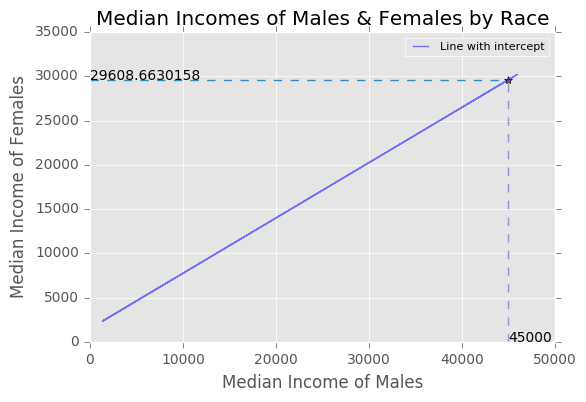

In [40]:
x = 45000
stipend_predict = regression_model.predict(X = np.array(x).reshape(-1,1))
plt.plot(x,stipend_predict[0][0], '*')
plt.plot([0,x], [stipend_predict[0][0],stipend_predict[0][0]], ls='--')
plt.plot([x,x], [0,stipend_predict[0][0]], ls='--')
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept', alpha =0.5)
plt.text(x,0,x)
plt.text(0,stipend_predict[0][0],stipend_predict[0][0])
plt.xlabel('Median Income of Males')
plt.ylabel('Median Income of Females')
plt.title('Median Incomes of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 8)

# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

In [ ]:
allmales[]